In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as p 
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
import pickle
from sklearn import set_config
set_config(transform_output="pandas")

In [3]:
df=pd.read_csv("taxitrip.csv")

In [4]:
df.sample(9)

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,end_hour,end_day_of_week,end_month,end_is_weekend,Fare_per_mile,minutes_per_mile,mile_bins,second_bins,hour_sin,hour_cos
111703,b922ed29df0652b5f89cbee89f440310e00ca0a5,8f46e1c3b98d33dc946bb70a33d138c1d4414f3723aceb...,2024-02-23 09:00:00,2024-02-23 09:15:00,1092.0,4.99,1.703108e+10,1.703184e+10,8.0,33.0,...,9.0,4.0,2.0,0,2.352705,3.647295,"(2, 5]",NaN,7.071068e-01,-0.707107
345998,27f863bb4c3108e3cba23a978422ff6fbb11523a,dd38b7cebd5414ae2b17595c68048ff8745c5147487c6c...,2024-02-07 15:00:00,2024-02-07 15:30:00,1260.0,11.50,NaN,NaN,28.0,11.0,...,15.0,2.0,2.0,0,2.630435,1.826087,"(10, 20]",NaN,-7.071068e-01,-0.707107
231603,42303757b529d212b67041bfc44494f734a29940,cb2962028f904da7176a904550dcaf595d78fc9ffeaacd...,2024-02-15 12:45:00,2024-02-15 12:45:00,180.0,0.50,1.703132e+10,1.703132e+10,32.0,32.0,...,12.0,3.0,2.0,0,9.000000,6.000000,"(0, 2]",NaN,1.224647e-16,-1.000000
171146,8effb914739a419899dece151354b6f2f1109f8f,75cf3a53aae5e5858361a7ca64f75d3407dc0a44d7bc42...,2024-02-19 20:30:00,2024-02-19 20:45:00,1198.0,6.09,NaN,NaN,77.0,24.0,...,20.0,0.0,2.0,0,2.761905,3.278599,"(5, 10]",NaN,-8.660254e-01,0.500000
139600,5d259bc1d0ffb75c445b32bf11d14bb3f8fc97a8,42560393a9c9b9ae28339f4b5aec77fd89bd49916ad541...,2024-02-21 17:45:00,2024-02-21 18:00:00,717.0,2.02,1.703128e+10,1.703108e+10,28.0,8.0,...,18.0,2.0,2.0,0,4.702970,5.915842,"(2, 5]",NaN,-9.659258e-01,-0.258819
433423,c26f498149897aebaa07134697d7e969d531402e,b8a5f651f4f7a0d48ff297f0d11840aac9079a42ebd3fc...,2024-02-01 11:45:00,2024-02-01 11:45:00,396.0,1.23,1.703108e+10,1.703132e+10,8.0,32.0,...,11.0,3.0,2.0,0,5.487805,5.365854,"(0, 2]",NaN,2.588190e-01,-0.965926
353452,66e283368fd9586f98b2b917585ffa5040c159c5,b5e2695a2f44b9bce7a0a86148ac418802f0067be1f6d4...,2024-02-07 08:00:00,2024-02-07 08:15:00,945.0,1.71,NaN,NaN,7.0,8.0,...,8.0,2.0,2.0,0,5.847953,9.210526,"(0, 2]",NaN,8.660254e-01,-0.500000
687827,4dd94b0caf39be28f0297aae742ebefca944f1c1,b56b31883524426035c290bfdbe4e038baccc814842c10...,2024-01-15 15:15:00,2024-01-15 15:30:00,857.0,2.64,1.703183e+10,1.703108e+10,28.0,8.0,...,15.0,0.0,1.0,0,3.537879,5.410354,"(2, 5]",NaN,-7.071068e-01,-0.707107
449004,c568660a4d83f0663691b373265a8a05fbac4eb4,48c3c22d766613be3982924a72efdc03758b9666b3996b...,2024-01-31 12:30:00,2024-01-31 12:45:00,600.0,1.80,1.703128e+10,1.703128e+10,28.0,28.0,...,12.0,2.0,1.0,0,4.444444,5.555556,"(0, 2]",NaN,1.224647e-16,-1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863104 entries, 0 to 863103
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     863104 non-null  object 
 1   Taxi ID                     863103 non-null  object 
 2   Trip Start Timestamp        863104 non-null  object 
 3   Trip End Timestamp          863104 non-null  object 
 4   Trip Seconds                863104 non-null  float64
 5   Trip Miles                  863104 non-null  float64
 6   Pickup Census Tract         326058 non-null  float64
 7   Dropoff Census Tract        312719 non-null  float64
 8   Pickup Community Area       839952 non-null  float64
 9   Dropoff Community Area      779486 non-null  float64
 10  Fare                        863104 non-null  float64
 11  Tips                        863104 non-null  float64
 12  Tolls                       863104 non-null  float64
 13  Extras        

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
df.columns

Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location', 'start_hour', 'start_day_of_week',
       'start_month', 'start_is_weekend', 'end_hour', 'end_day_of_week',
       'end_month', 'end_is_weekend', 'Fare_per_mile', 'minutes_per_mile',
       'mile_bins', 'second_bins', 'hour_sin', 'hour_cos'],
      dtype='object')

In [59]:
df['Avg_Speed'] = df['Trip Miles'] / (df['Trip Seconds'].replace(0, np.nan) / 3600)

In [416]:
df['Hav_miles'] = df['Haversine_Dist'] * 0.621371
df['Avg_Speed_mph'] = df['Hav_miles'] / (df['Trip Seconds'].replace(0, np.nan) / 3600)


In [272]:
import numpy as np
import pandas as pd

# Example: using your taxi dataset
# Assuming df has: Pickup Centroid Latitude, Pickup Centroid Longitude,
#                  Dropoff Centroid Latitude, Dropoff Centroid Longitude

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    
    # Convert to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

# Apply to dataframe
df["Haversine_Dist"] = haversine(
    df["Pickup Centroid Latitude"],
    df["Pickup Centroid Longitude"],
    df["Dropoff Centroid Latitude"],
    df["Dropoff Centroid Longitude"]
)

print(df[["Haversine_Dist"]].head())


   Haversine_Dist
0        0.000000
1        3.567250
2             NaN
3       21.368080
4        7.595261


In [460]:
# Airport coordinates
airports = {
    "O'Hare": (41.9742, -87.9073),
    "Midway": (41.7868, -87.7522)
}


In [461]:
for name, (lat, lon) in airports.items():
    df[f'dist_to_{name}'] = haversine(
        df['Pickup Centroid Latitude'], df['Pickup Centroid Longitude'],
        lat, lon
    )
    df[f'drop_dist_to_{name}'] = haversine(
        df['Dropoff Centroid Latitude'], df['Dropoff Centroid Longitude'],
        lat, lon
    )


In [462]:
for name in airports.keys():
    df[f'is_{name}_trip'] = (
        (df[f'dist_to_{name}'] < 2) | 
        (df[f'drop_dist_to_{name}'] < 2)
    ).astype(int)


In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863104 entries, 0 to 863103
Data columns (total 50 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     863104 non-null  object 
 1   Taxi ID                     863103 non-null  object 
 2   Trip Start Timestamp        863104 non-null  object 
 3   Trip End Timestamp          863104 non-null  object 
 4   Trip Seconds                863104 non-null  float64
 5   Trip Miles                  863104 non-null  float64
 6   Pickup Census Tract         326058 non-null  float64
 7   Dropoff Census Tract        312719 non-null  float64
 8   Pickup Community Area       839952 non-null  float64
 9   Dropoff Community Area      779486 non-null  float64
 10  Fare                        863104 non-null  float64
 11  Tips                        863104 non-null  float64
 12  Tolls                       863104 non-null  float64
 13  Extras        

In [709]:
X_train,X_Test,y_train,y_test=train_test_split(df[[ 'Trip Seconds','Trip Miles','Haversine_Dist','Avg_Speed', "is_O'Hare_trip",
    'is_Midway_trip']],df['Fare'],test_size=0.3,random_state=42)

In [710]:
X_train.head(
    
)

,Trip Seconds,Trip Miles,Haversine_Dist,Avg_Speed,is_O'Hare_trip,is_Midway_trip
715280,300.0,0.80,2.024419,9.600000,0,0
357355,1680.0,15.40,NaN,33.000000,0,0
481734,1121.0,11.01,12.964213,35.357716,0,0
174917,3245.0,20.37,NaN,22.598459,1,0
703597,2407.0,9.71,11.487968,14.522642,0,0


In [711]:
print("Inf values in X_train:", np.isinf(X_train).sum().sum())
print("Inf values in y_train:", np.isinf(y_train).sum())

# Check for NaNs
print("NaN values in X_train:", np.isnan(X_train).sum().sum())
print("NaN values in y_train:", np.isnan(y_train).sum())

Inf values in X_train: 0
Inf values in y_train: 0
NaN values in X_train: 70958
NaN values in y_train: 0


In [712]:
from sklearn.preprocessing import FunctionTransformer


In [713]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_Test = X_Test.replace([np.inf, -np.inf], np.nan)

In [714]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 604172 entries, 715280 to 121958
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Trip Seconds    604172 non-null  float64
 1   Trip Miles      604172 non-null  float64
 2   Haversine_Dist  544761 non-null  float64
 3   Avg_Speed       592625 non-null  float64
 4   is_O'Hare_trip  604172 non-null  int64  
 5   is_Midway_trip  604172 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 32.3 MB


In [715]:
log_features = ['Trip Seconds','Trip Miles','Haversine_Dist','Avg_Speed']

preprocessor = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p, validate=True), log_features),
    ('pass', 'passthrough', ['is_O\'Hare_trip','is_Midway_trip'])
])

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(max_depth=8))
])


In [716]:


pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])


In [717]:
pipeline.fit(X_train,y_train)

d:\Taxi Trip Project\taxitrip\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:314: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))


,steps,"[('imputer', ...), ('preprocessor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,transformers,"[('log', ...), ('pass', ...)]"


In [718]:
y_pred=pipeline.predict(X_Test)

d:\Taxi Trip Project\taxitrip\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:314: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))


In [719]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 258.06469275789306
R2 Score: 0.6505297140237795


In [720]:
pipeline2.fit(X_train,y_train)

d:\Taxi Trip Project\taxitrip\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:314: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))


,steps,"[('imputer', ...), ('preprocessor', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,transformers,"[('log', ...), ('pass', ...)]"


In [721]:
y_pred2=pipeline2.predict(X_Test)

d:\Taxi Trip Project\taxitrip\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:314: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))


In [722]:
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print(f"Mean Squared Error: {mse}")
print(f"R2 Scorefor linear regression: {r2}")

Mean Squared Error: 528.966496098143
R2 Scorefor linear regression: 0.28367545870877997


In [663]:
from sklearn.model_selection import GridSearchCV

param_grid = {'model__n_estimators': [100, 300], 'model__max_depth': [6,8,9], 'model__learning_rate': [0.05, 0.1]}
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print(f"Best R²: {grid.best_score_}")

d:\Taxi Trip Project\taxitrip\Lib\site-packages\sklearn\preprocessing\_function_transformer.py:314: UserWarning: When `set_output` is configured to be 'pandas', `func` should return a pandas DataFrame to follow the `set_output` API  or `feature_names_out` should be defined.
  warnings.warn(warn_msg.format("pandas"))


Best R²: 0.6425942916813048


In [188]:
df_num = df.select_dtypes(include=['number'])


In [547]:
df_num.corr()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,...,end_day_of_week,end_month,end_is_weekend,Fare_per_mile,minutes_per_mile,hour_sin,hour_cos,Avg_Speed,Hour,DayOfWeek
Trip Seconds,1.000000,0.369424,0.319501,0.052627,0.231200,0.078712,0.350910,0.173845,0.000069,0.035883,...,0.011225,0.000411,0.006882,-0.023493,0.153281,-0.064368,0.015851,0.006680,0.047331,0.010498
Trip Miles,0.369424,1.000000,0.515256,0.070531,0.465252,0.131750,0.804253,0.385110,-0.000165,0.096367,...,0.021233,-0.001749,0.046118,-0.047334,-0.021743,-0.030876,0.071354,0.206302,0.039890,0.021702
Pickup Census Tract,0.319501,0.515256,1.000000,0.068546,0.878042,0.072673,0.520878,0.423716,0.001658,0.153456,...,-0.005436,-0.007444,0.052126,0.005202,-0.015333,-0.147973,0.147110,0.051204,0.164544,-0.005171
Dropoff Census Tract,0.052627,0.070531,0.068546,1.000000,0.077666,0.769877,0.099029,0.054444,0.001876,0.006594,...,-0.028900,0.003204,-0.024106,0.026791,0.013065,0.153457,-0.046188,0.003906,-0.146041,-0.028835
Pickup Community Area,0.231200,0.465252,0.878042,0.077666,1.000000,0.080909,0.415368,0.423099,0.001637,0.120414,...,0.005047,-0.010785,0.037750,-0.007137,-0.006923,-0.117367,0.118914,0.045499,0.127043,0.006162
Dropoff Community Area,0.078712,0.131750,0.072673,0.769877,0.080909,1.000000,0.145619,-0.015943,0.001186,-0.003945,...,-0.005285,0.004602,-0.002325,0.014404,0.002002,0.112446,-0.064217,0.015060,-0.104926,-0.005445
Fare,0.350910,0.804253,0.520878,0.099029,0.415368,0.145619,1.000000,0.364308,0.000338,0.080540,...,0.023723,-0.005809,0.045488,0.108903,-0.009925,-0.032033,0.075192,0.157700,0.034765,0.023976
Tips,0.173845,0.385110,0.423716,0.054444,0.423099,-0.015943,0.364308,1.000000,0.000445,0.121092,...,0.010351,-0.004515,0.023024,0.006583,-0.011025,-0.086377,0.108738,0.024189,0.090070,0.010846
Tolls,0.000069,-0.000165,0.001658,0.001876,0.001637,0.001186,0.000338,0.000445,1.000000,0.659114,...,0.000528,-0.000286,-0.000607,0.000934,0.000907,0.000348,-0.001936,-0.000187,-0.000473,0.000524
Extras,0.035883,0.096367,0.153456,0.006594,0.120414,-0.003945,0.080540,0.121092,0.659114,1.000000,...,0.002521,-0.003413,0.009277,-0.002973,-0.001046,-0.024731,0.027871,0.006182,0.022225,0.002759


In [274]:
df["Haversine_Dist_Miles"] = df["Haversine_Dist"] * 0.621371


In [465]:
from sklearn.feature_selection import mutual_info_regression

# Avoid division by zero when calculating Avg_Speed
df['Avg_Speed'] = df['Trip Miles'] / (df['Trip Seconds'].replace(0, np.nan) / 3600)

# Extract time-based features
df['Hour'] = pd.to_datetime(df['Trip Start Timestamp']).dt.hour
df['DayOfWeek'] = pd.to_datetime(df['Trip Start Timestamp']).dt.dayofweek

# Prepare features
X = df[['Avg_Speed_mph',"is_O'Hare_trip",'is_Midway_trip']]

# Replace NaN or Inf with 0 (or better: impute with median)
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)

# One-hot encode categorical features (Hour, DayOfWeek)
X_encoded = pd.get_dummies(X, drop_first=True)

# Mutual information
mi_scores = mutual_info_regression(X_encoded, df['Fare'], random_state=42)
mi = pd.Series(mi_scores, index=X_encoded.columns).sort_values(ascending=False)
print(mi.head(10))




Avg_Speed_mph     0.591097
is_O'Hare_trip    0.271075
is_Midway_trip    0.031846
dtype: float64


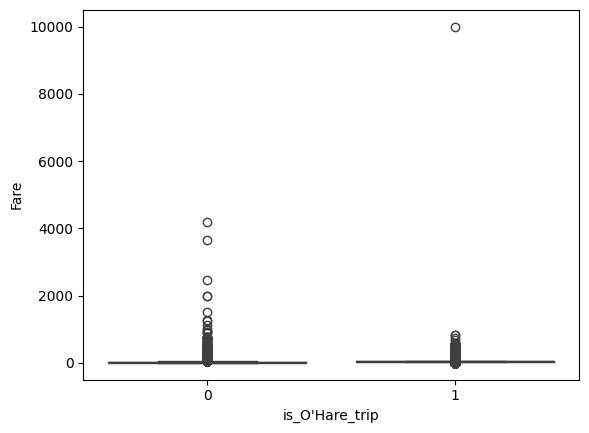

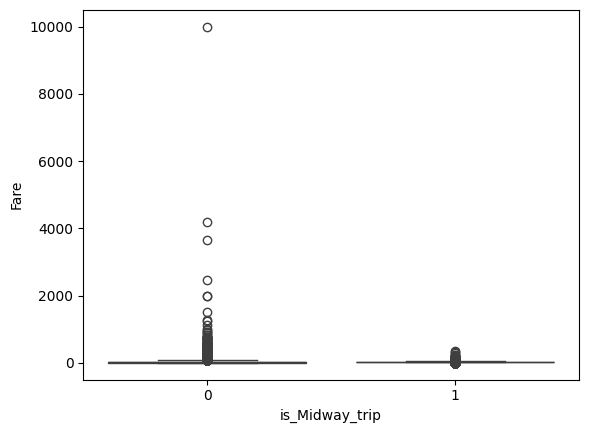

In [466]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="is_O'Hare_trip", y="Fare", data=df)
plt.show()

sns.boxplot(x="is_Midway_trip", y="Fare", data=df)
plt.show()
